In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

W radioastronomii analizuje się sygnały z gwiazd w celu otrzymania oszacowań pewnych charakterystycznych parametrów badanej gwiazdy. Le Gland w swojej pracy doktorskiej *Estimation de paramètres dans les processus stochastiques, en observation incomplète: application à un problème de radio-astronomie* zaproponował postać sygnału jako następujący proces stochastyczny o wartościach zespolonych: 

$$\eta_{t} = a\exp(\renewcommand{\di}{i}\di\hspace{0.05cm}(b\hspace{0.1cm} +\hspace{0.1cm}X_{t}))+r\xi_{t},$$


 gdzie $a$ jest amplitudą sygnału, $b$ średnią fazą, $X_{t}$ procesem stochastycznym o rzeczywistych wartościach, reprezentującym turbulencje atmosferyczne. Ponadto, $\xi_{t}$ jest gaussowskim białym szumem o zespolonych wartościach, modelującym błędy pomiarów, a $r$ to różna od zera liczba rzeczywista. Dla danego procesu $X_{t}$ równanie może zostać przedstawione jako układ trzech równań:

## Turbulencje atmosferyczne zadane procesem Ornsteina-Uhlenbecka
\begin{cases}dY_{t}^{1} \hspace{0.1cm}= \hspace{0.1cm}a\cos(b\hspace{0.1cm}+\hspace{0.1cm}X_{t})\hspace{0.05cm}dt\hspace{0.1cm}+\hspace{0.1cm}r\hspace{0.05cm}dW_{t}^{1} \\ 
dY_{t}^{2}\hspace{0.1cm}= \hspace{0.1cm}a\sin(b\hspace{0.1cm}+\hspace{0.1cm}X_{t})\hspace{0.05cm}dt\hspace{0.1cm}+\hspace{0.1cm}r\hspace{0.05cm}dW_{t}^{2}\\
dX_{t}\hspace{0.1cm}=\hspace{0.1cm}-\beta X_{t}\hspace{0.05cm}dt\hspace{0.1cm}+\hspace{0.1cm}\sigma\sqrt{2\beta}\hspace{0.05cm}dW_{t}^{3}\end{cases}


Le Gland we wspomnianej wcześniej pracy doktorskiej rozważał turbulencje atmosferyczne zadane procesem Ornsteina-Uhlenbecka oraz wyestymował poniższe wartości parametrów $r,\sigma,\beta,a,b$, natomiast wartości początkowe zostały dobrane przez nas.

In [ ]:
r = 0.25
sigma = 1.0
beta = 0.2
sq_beta = np.sqrt(2*beta)
a = 1.0
b = 0.0

y_1_0 = 2.0
y_2_0 = 0.5
x_0 = 0.2
T = 2.0

In [ ]:
# n_rz - liczba punktów siatki rzadkiej
# n_g - podział siatki rzadkiej na gęstą
# oblicz rozwiazanie w siatkach o n_rz i n_rz*n_g punktach

def A(t, x):
  return a*np.cos(b + x), a*np.sin(b + x), -beta*x
  
B = [r, r, sigma*sq_beta]

def Euler(n_rz, n_g): 
  t_rz = 0.0
  t_g = 0.0

  h_rz = float(T/n_rz) # siatka rzadka
  h_sqrt_rz = np.sqrt(h_rz)

  h_g = float(h_rz/n_g) # siatka gęsta
  h_sqrt_g = np.sqrt(h_g)

  Y_1_g = y_1_0 # rozwiązanie na siatce gęstej
  Y_2_g = y_2_0
  X_g = x_0
  t_temp_g = 0.0
  t_temp_rz = 0.0
  Y_1_g_temp = y_1_0 
  Y_2_g_temp = y_2_0
  X_g_temp = x_0
  Y_1_rz = y_1_0 # rozwiązanie na siatce rzadkiej
  Y_2_rz = y_2_0
  X_rz = x_0
  Y_1_rz_temp = y_1_0 
  Y_2_rz_temp = y_2_0
  X_rz_temp = x_0
  W1_1 = 0.0
  W1_2 = 0.0
  W1 = 0.0
  W2_1 = 0.0
  W2_2 = 0.0
  W2 = 0.0 # bieżąca wartość procesu Wienera

  for i in range(1, n_rz+1):
    for j in range(1, n_g+1):
      t_g = t_rz + h_g*j # podział gęsty
      dW_1 = np.random.normal(0, h_sqrt_g)
      dW_2 = np.random.normal(0, h_sqrt_g)
      dW = np.random.normal(0, h_sqrt_g)
      W2_1 += dW_1
      W2_2 += dW_2
      W2 += dW
      A_temp_g = A(t_temp_g, X_g_temp)
      Y_1_g = Y_1_g_temp + A_temp_g[0]*h_g + B[0]*dW_1
      Y_2_g = Y_2_g_temp + A_temp_g[1]*h_g + B[1]*dW_2
      X_g = X_g_temp + A_temp_g[2]*h_g + B[2]*dW
      Y_1_g_temp = Y_1_g
      Y_2_g_temp = Y_2_g
      X_g_temp = X_g
      t_temp_g = t_g
    t_rz = i*h_rz  # podział rzadki
    W_1 = W2_1 - W1_1
    W_2 = W2_2 - W1_2
    W = W2 - W1
    A_temp_rz = A(t_temp_rz, X_rz_temp)
    Y_1_rz = Y_1_rz_temp + A_temp_rz[0]*h_rz + B[0]*W_1
    Y_2_rz = Y_2_rz_temp + A_temp_rz[1]*h_rz + B[1]*W_2
    X_rz = X_rz_temp + A_temp_rz[2]*h_rz + B[2]*W
    Y_1_rz_temp = Y_1_rz
    Y_2_rz_temp = Y_2_rz
    X_rz_temp = X_rz
    t_temp_rz = t_rz
    W1_1 = W2_1
    W1_2 = W2_2
    W1 = W2
  return  Y_1_g, Y_2_g, X_g, Y_1_rz, Y_2_rz, X_rz


In [ ]:
E = []
for i in range (1,9):
  e = []
  N = 10 * 2 ** i 
  for j in range(50):
    Y_1_g,  Y_2_g, X_g, Y_1_rz, Y_2_rz, X_rz = Euler(N,100)
    NORMA = np.sqrt((Y_1_g - Y_1_rz)**2 + (Y_2_g - Y_2_rz)**2 + (X_g - X_rz)**2)
    e.append(NORMA)
  E.append((N, np.mean(e)))
  print(E[i-1])

(20, 0.028708502557899543)
(40, 0.016145810331310642)
(80, 0.008549936844996955)
(160, 0.004174146414036793)
(320, 0.0017891147262612808)
(640, 0.0008871682524299833)
(1280, 0.000503672373870153)
(2560, 0.00025474836209199035)


In [ ]:
N_ = []
err = []
for i in E:
  N_.append(i[0])
  err.append(i[1])
d = {'n':N_, 'err':err, 'log n':np.log10(N_), 'log err':np.log10(err)}

import pandas as pd
df = pd.DataFrame(d)
df

,n,err,log n,log err
0,20,0.028709,1.30103,-1.541989
1,40,0.016146,1.60206,-1.791940
2,80,0.008550,1.90309,-2.068037
3,160,0.004174,2.20412,-2.379432
4,320,0.001789,2.50515,-2.747362
5,640,0.000887,2.80618,-3.051994
6,1280,0.000504,3.10721,-3.297852
7,2560,0.000255,3.40824,-3.593889


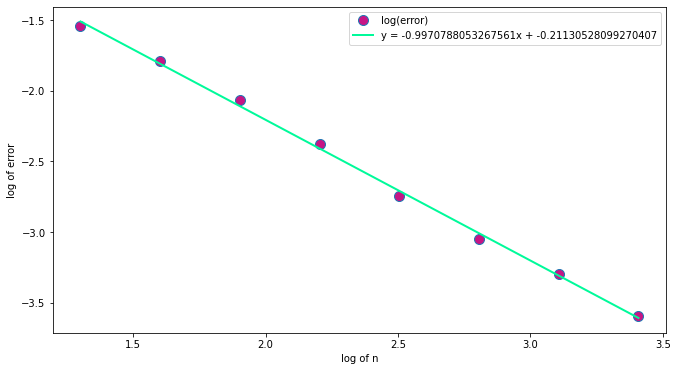

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['log n'],df['log err'])

mn=np.min(np.log10(N_))
mx=np.max(np.log10(N_))

X = np.linspace(mn,mx,500)

plt.figure(figsize=(11,6))
plt.plot(df['log n'],df['log err'], 'o', markersize=10, markerfacecolor='mediumvioletred', label='log(error)')
plt.plot(X, slope*X+intercept, color='#00fa9a', linewidth='2', label='y = '+str(slope)+'x + '+str(intercept))
plt.xlabel('log of n')
plt.ylabel('log of error')
plt.legend()
plt.show()

Otrzymaliśmy empiryczne tempo zbieżności bliskie -1, czyli lepsze niż spodziewane $-\frac{1}{2}$. Prawdopodobnie jest to spowodowane regularnością współczynnika dryfu oraz niezależnością współczynnika dyfuzji od rozwiązania.

## Turbulencje atmosferyczne zadane procesem Mazurek-Kachla
\begin{cases}dY_{t}^{1} \hspace{0.1cm}= \hspace{0.1cm}a\cos(b\hspace{0.1cm}+\hspace{0.1cm}X_{t})\hspace{0.05cm}dt\hspace{0.1cm}+\hspace{0.1cm}r\hspace{0.05cm}dW_{t}^{1} \\ 
dY_{t}^{2}\hspace{0.1cm}= \hspace{0.1cm}a\sin(b\hspace{0.1cm}+\hspace{0.1cm}X_{t})\hspace{0.05cm}dt\hspace{0.1cm}+\hspace{0.1cm}r\hspace{0.05cm}dW_{t}^{2}\\
dX_{t}\hspace{0.1cm}=\hspace{0.1cm}-X_{t}e^{-t^{2}+1}\hspace{0.05cm}dt\hspace{0.1cm}+\hspace{0.1cm}tX_{t}\hspace{0.05cm}dW_{t}^{1}\hspace{0.1cm}+\hspace{0.1cm}(1-t)\hspace{0.05cm}dW_{t}^{2}\hspace{0.1cm}+\hspace{0.1cm}\frac{\sin X_{t}}{t+1}\hspace{0.05cm}dW_{t}^{3}\end{cases}


$X_{t}$ dobraliśmy tak aby współczynnik dyfuzji zależał od rozwiązania układu, a w rezultacie aby empiryczny rząd zbieżności spadł do spodziewanej wartości $-\frac{1}{2}$.

In [ ]:
# n_rz - liczba punktów siatki rzadkiej
# n_g - podział siatki rzadkiej na gęstą
# oblicz rozwiazanie w siatkach o n_rz i n_rz*n_g punktach

def A_1(t, x):
  return a*np.cos(b + x), a*np.sin(b + x), -x*np.exp(-t**2+1)

def B_1(t, x):
  return [r, r, [x*t, 1-t, np.sin(x)/(t+1)]]

def Euler_1(n_rz, n_g): 
  t_rz = 0.0
  t_g = 0.0

  h_rz = float(T/n_rz) # siatka rzadka
  h_sqrt_rz = np.sqrt(h_rz)

  h_g = float(h_rz/n_g) # siatka gęsta
  h_sqrt_g = np.sqrt(h_g)

  Y_1_g = y_1_0 # rozwiązanie na siatce gęstej
  Y_2_g = y_2_0
  X_g = x_0
  t_temp_g = 0.0
  t_temp_rz = 0.0
  Y_1_g_temp = y_1_0 
  Y_2_g_temp = y_2_0
  X_g_temp = x_0
  Y_1_rz = y_1_0 # rozwiązanie na siatce rzadkiej
  Y_2_rz = y_2_0
  X_rz = x_0
  Y_1_rz_temp = y_1_0 
  Y_2_rz_temp = y_2_0
  X_rz_temp = x_0
  W1_1 = 0.0
  W1_2 = 0.0
  W1 = 0.0
  W2_1 = 0.0
  W2_2 = 0.0
  W2 = 0.0 # bieżąca wartość procesu Wienera

  for i in range(1, n_rz+1):
    for j in range(1, n_g+1):
      t_g = t_rz + h_g*j # podział gęsty
      dW_1 = np.random.normal(0, h_sqrt_g)
      dW_2 = np.random.normal(0, h_sqrt_g)
      dW = np.random.normal(0, h_sqrt_g)
      W2_1 += dW_1
      W2_2 += dW_2
      W2 += dW
      A_temp_g = A_1(t_temp_g, X_g_temp)
      B_temp_g = B_1(t_temp_g, X_g_temp)
      Y_1_g = Y_1_g_temp + A_temp_g[0]*h_g + B_temp_g[0]*dW_1
      Y_2_g = Y_2_g_temp + A_temp_g[1]*h_g + B_temp_g[1]*dW_2
      X_g = X_g_temp + A_temp_g[2]*h_g + B_temp_g[2][0]*dW_1 + B_temp_g[2][1]*dW_2 + B_temp_g[2][2]*dW
      Y_1_g_temp = Y_1_g
      Y_2_g_temp = Y_2_g
      X_g_temp = X_g
      t_temp_g = t_g
    t_rz = i*h_rz # podział rzadki
    W_1 = W2_1 - W1_1
    W_2 = W2_2 - W1_2
    W = W2 - W1
    A_temp_rz = A_1(t_temp_rz, X_rz_temp)
    B_temp_rz = B_1(t_temp_rz, X_rz_temp)
    Y_1_rz = Y_1_rz_temp + A_temp_rz[0]*h_rz + B_temp_rz[0]*W_1
    Y_2_rz = Y_2_rz_temp + A_temp_rz[1]*h_rz + B_temp_rz[1]*W_2
    X_rz = X_rz_temp + A_temp_rz[2]*h_rz + B_temp_rz[2][0]*W_1 + B_temp_rz[2][1]*W_2 + B_temp_rz[2][2]*W
    Y_1_rz_temp = Y_1_rz
    Y_2_rz_temp = Y_2_rz
    X_rz_temp = X_rz
    t_temp_rz = t_rz
    W1_1 = W2_1
    W1_2 = W2_2
    W1 = W2
  return  Y_1_g,  Y_2_g, X_g, Y_1_rz, Y_2_rz, X_rz 

In [ ]:
E = []
for i in range (1,9):
  e = []
  N = 10 * 2 ** i 
  for j in range(50):
    Y_1_g,  Y_2_g, X_g, Y_1_rz, Y_2_rz, X_rz = Euler_1(N,100)
    NORMA = np.sqrt((Y_1_g - Y_1_rz)**2 + (Y_2_g - Y_2_rz)**2 + (X_g - X_rz)**2)
    e.append(NORMA)
  E.append((N, np.mean(e)))
  print(E[i-1])

(20, 0.3431653457568567)
(40, 0.24465495853112035)
(80, 0.10624727153878338)
(160, 0.16315389651994877)
(320, 0.06342495070153782)
(640, 0.04233685126210143)
(1280, 0.050877083214995907)
(2560, 0.02590728569036405)


In [ ]:
N_ = []
err = []
for i in E:
  N_.append(i[0])
  err.append(i[1])
d = {'n':N_, 'err':err, 'log n':np.log10(N_), 'log err':np.log10(err)}

import pandas as pd
df = pd.DataFrame(d)
df

,n,err,log n,log err
0,20,0.343165,1.30103,-0.464497
1,40,0.244655,1.60206,-0.611446
2,80,0.106247,1.90309,-0.973682
3,160,0.163154,2.20412,-0.787403
4,320,0.063425,2.50515,-1.197740
5,640,0.042337,2.80618,-1.373281
6,1280,0.050877,3.10721,-1.293478
7,2560,0.025907,3.40824,-1.586578


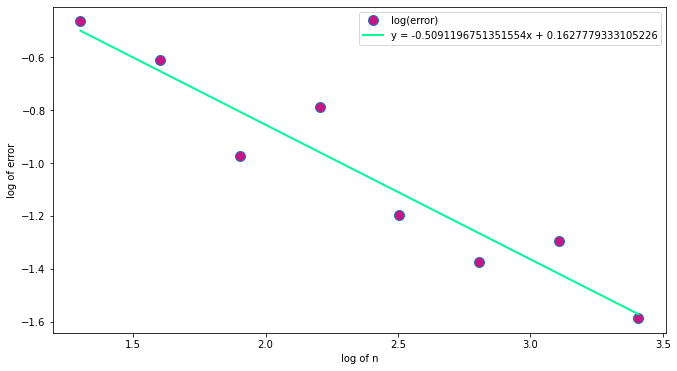

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['log n'],df['log err'])

mn=np.min(np.log10(N_))
mx=np.max(np.log10(N_))

X = np.linspace(mn,mx,500)

plt.figure(figsize=(11,6))
plt.plot(df['log n'],df['log err'], 'o', markersize=10, markerfacecolor='mediumvioletred', label='log(error)')
plt.plot(X, slope*X+intercept, color='#00fa9a', linewidth='2', label='y = '+str(slope)+'x + '+str(intercept))
plt.xlabel('log of n')
plt.ylabel('log of error')
plt.legend()
plt.show()